In [2]:
# Imports, nothing to see here
import random
import math
import sys,os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sys.path.insert(0, os.path.abspath('..'))
from spreadsheet.cell import Cell
from spreadsheet.arraySpreadsheet import ArraySpreadsheet
from spreadsheet.linkedlistSpreadsheet import LinkedListSpreadsheet
from spreadsheet.csrSpreadsheet import CSRSpreadsheet
from spreadsheet.baseSpreadsheet import BaseSpreadsheet
from time import perf_counter

In [3]:
def create_random_cells(density: int, max_col:int, max_row:int) -> list[Cell]:
    """
    num_cells: number of cells you want
    max_col: maximum number of columns you want in your spreadsheet
    max_row: maximum number of rows you want in your spreadsheet
    """
    num_cells = (density*max_col*max_row).__ceil__()
    lCells = []
    lCells.append(Cell((max_row-1),(max_col-1),round(random.uniform(0.1,9.9), ndigits=2)))
    for _ in range(num_cells):
        row = random.randint(0, max_col-1)
        col = random.randint(0, max_row-1)
        val = round(random.uniform(0.1,9.9), ndigits=2)
        lCells.append(Cell(row, col, val))
    return lCells

def create_density(cells_to_generate:int, density:float):
    """
    percentage is a float of the percent of non-None cells you want, e.g. 0.1 represents 10% cells
    with non-None values.
    """
    max_rows = derive_size(cells_to_generate, density)
    max_cols = max_rows
    ret = []
    ret.append(Cell((max_rows-1),(max_cols-1),(round(random.uniform(0.1,9.9), ndigits=2))))
    cells_to_make = cells_to_generate-1
    while cells_to_make > 0:
        row = random.randint(0, max_cols-1)
        col = random.randint(0, max_rows-1)
        val = round(random.uniform(0.1,9.9), ndigits=2)
        ret.append(Cell(row, col,val))
        cells_to_make -=1
    return (ret, max_cols,max_rows)

def derive_size(cells_to_generate:int, density:float):
    # for some number of cells to generate and some density given, 
    #return the number of columns and rows needed for that density
    #so for 100 cells to generate at 0.1 density, we should have a max of  32ish rows and columns
    inv_density = 1/density
    dimension = math.sqrt(cells_to_generate*inv_density).__ceil__()
    return dimension

def write_to_file(cells_to_generate:int, max_col:int, max_row:int):
    file = open("sample_data.txt","w")
    file.write(create_random_cells(cells_to_generate, max_col, max_row))
    file.close()

def display_array(array: ArraySpreadsheet):
    arr =array.array 
    for x in arr:
        for y in x:
            if(y.val == None):
                print("("+str(y.row),str(y.col)+" N)", end = " ")
            else:
                print(y, end = " ")
        print() #newline
    print("finished")

def get_lCells()->list[Cell]:
    """
    basically read from the file and create a list of cells from the data from the file
    """
    try:
        lcells = []
        dataFile = open("sample_data.txt", 'r')
        for line in dataFile:
            values = line.split()
            currRow = int(values[0])
            currCol = int(values[1])
            currVal = float(values[2])
            currCell = Cell(currRow, currCol, currVal)
            # each line contains a cell
            lcells.append(currCell)
        dataFile.close()
        return lcells
    except FileNotFoundError as e:
        print("Data file doesn't exist.")

def set_up_cells(cells_to_generate, max_col, max_row):
    write_to_file(cells_to_generate, max_col, max_row)
    return get_lCells()

def test_buildSpreadSheet(spreadSheet:BaseSpreadsheet,lCells:list[Cell]):
    start_time = perf_counter()
    spreadSheet.buildSpreadsheet(lCells)
    end_time = perf_counter()
    return end_time-start_time

def test_entries(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.entries()
    end_time = perf_counter()
    return end_time-start_time

def test_update(spreadSheet:BaseSpreadsheet, rowIndex: int, colIndex:int, val:float):
    start_time = perf_counter()
    spreadSheet.update(rowIndex, colIndex,val)
    end_time = perf_counter()
    return end_time-start_time

def test_append_row(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.appendRow()
    end_time = perf_counter()
    return end_time-start_time

def test_append_col(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.appendCol()
    end_time = perf_counter()
    return end_time-start_time

def test_insert_row(spreadSheet:BaseSpreadsheet, rowIndex:int):
    start_time = perf_counter()
    spreadSheet.insertRow(rowIndex)
    end_time = perf_counter()
    return end_time-start_time

def test_insert_col(spreadsheet:BaseSpreadsheet, colIndex:int):
    start_time = perf_counter()
    spreadsheet.insertCol(colIndex)
    end_time = perf_counter()
    return end_time-start_time

def test_find(spreadSheet:BaseSpreadsheet, value:float):
    start_time = perf_counter()
    spreadSheet.find(value)
    end_time = perf_counter()
    return end_time-start_time

def different_densities(cells_to_generate:int):
    low = random.uniform(0.01,0.3)
    med = random.uniform(0.31,0.60)
    high = random.uniform(0.61,0.99)
    densities = [low, med, high ]
    lCells_list = []
    for x in densities:
        lCells_list.append(create_density(cells_to_generate,x))
    return lCells_list


In [284]:
#arrays
#small
small_spreadsheets = []
for x in range(10):
    small_spreadsheets.append(ArraySpreadsheet())
density = []
for x in range(1,11):
    density.append(create_density(500, 0.1*x))
small_spreadsheets_tests =[]
small_spreadsheets_tests.append([test_buildSpreadSheet(small_spreadsheets[x], density[x][0])*1000 for x in range(10)])
small_spreadsheets_tests.append([test_append_col(small_spreadsheets[x])*1000 for x in range(10)])
small_spreadsheets_tests.append([test_append_row(small_spreadsheets[x])*1000 for x in range(10)])
small_spreadsheets_tests.append([test_insert_col(small_spreadsheets[x], x)*1000 for x in range(10)])
small_spreadsheets_tests.append([test_insert_row(small_spreadsheets[x], x)*1000 for x in range(10)])
small_spreadsheets_tests.append([test_entries(small_spreadsheets[x])*1000 for x in range(10)]) 
small_spreadsheets_tests.append([test_find(small_spreadsheets[x],x)*1000 for x in range(10)]) 

df_small = pd.DataFrame(small_spreadsheets_tests)
df_small.columns = [str(density[x][1]*density[x][2]) for x in range(density.__len__())]
df_small.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries", "find"]

#medium
medium_spreadsheets = []
for x in range(10):
    medium_spreadsheets.append(ArraySpreadsheet())
density = []
for x in range(1,11):
    density.append(create_density(5000, 0.1*x))
medium_spreadsheets_tests =[]
medium_spreadsheets_tests.append([test_buildSpreadSheet(medium_spreadsheets[x], density[x][0])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_append_col(medium_spreadsheets[x])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_append_row(medium_spreadsheets[x])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_insert_col(medium_spreadsheets[x], x)*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_insert_row(medium_spreadsheets[x], x)*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_entries(medium_spreadsheets[x])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_find(medium_spreadsheets[x],x)*1000 for x in range(10)]) 



df_med = pd.DataFrame(medium_spreadsheets_tests)
df_med.columns = [str(density[x][1]*density[x][2]) for x in range(density.__len__())]
df_med.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries" , "find"]
df_med


#large
large_spreadsheets = []

for x in range(10):
    large_spreadsheets.append(ArraySpreadsheet())
density = []
for x in range(1,11):
    density.append(create_density(10000, 0.1*x))
large_spreadsheets_tests =[]
large_spreadsheets_tests.append([test_buildSpreadSheet(large_spreadsheets[x], density[x][0])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_append_col(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_append_row(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_insert_col(large_spreadsheets[x], x)*1000 for x in range(10)])
large_spreadsheets_tests.append([test_insert_row(large_spreadsheets[x], x)*1000 for x in range(10)])
large_spreadsheets_tests.append([test_entries(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_find(large_spreadsheets[x],x)*1000 for x in range(10)]) 

df_large = pd.DataFrame(large_spreadsheets_tests)
df_large.columns = [str(density[x][1]*density[x][2]) for x in range(density.__len__())]
df_large.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries", "find"]
display(df_small)
display(df_med)
display(df_large)


5041      2500      1681      1296      1024       841  \
build_spreadsheet  1.851750  0.953500  0.852208  0.648334  0.566125  0.479791   
append_col         0.026166  0.013916  0.010583  0.010250  0.009708  0.007041   
append_row         0.022542  0.014209  0.012709  0.010084  0.010417  0.008375   
insert_col         0.496292  0.245917  0.151333  0.121292  0.091709  0.076125   
insert_row         0.296500  0.148125  0.109625  0.079542  0.060542  0.047750   
entries            1.078542  0.894583  0.814125  0.755458  0.685959  0.655541   
find               0.338750  0.182417  0.128791  0.102541  0.083500  0.070459   

                        729       625       576       529  
build_spreadsheet  0.570041  0.411583  0.399666  0.551667  
append_col         0.006500  0.007250  0.006416  0.013792  
append_row         0.007917  0.007333  0.008208  0.016250  
insert_col         0.070417  0.054791  0.054500  0.040375  
insert_row         0.040375  0.042458  0.030916  0.025833  
entries            0.626083  0.579708  0.537292  0.548458  
find               0.062292  0.054167  0.049916  0.046083

50176       25281      16900      12544      10000  \
build_spreadsheet  18.498125  357.797209   8.427292   7.008666   6.116583   
append_col          0.179917    0.051416   0.047167   0.037708   0.029875   
append_row          0.262459    0.043459   0.043333   0.030917   0.027417   
insert_col          6.399375    3.369417   2.262750   1.573750   1.171417   
insert_row          4.748583    2.689583   1.777666   1.228834   0.788209   
entries            16.436875   13.250708  11.671000  12.053125  11.441875   
find                5.958458    4.713417   3.110458   2.001458   1.306875   

                        8464      7225       6400      5625      5041  
build_spreadsheet   5.536125  5.008083   4.878042  4.422834  4.225167  
append_col          0.051084  0.029125   0.018833  0.017041  0.016208  
append_row          0.033166  0.023667   0.021791  0.020417  0.027834  
insert_col          0.985750  0.804042   0.718709  0.646167  0.571250  
insert_row          0.722083  0.579042   0.512583  0.432167  0.381917  
entries            10.257000  9.610166  10.049250  8.660042  8.736667  
find                1.250917  1.109708   0.938042  0.814500  0.586458

100489      50176      33489      25281      20164  \
build_spreadsheet  39.420750  23.531959  18.372667  16.302625  13.371542   
append_col          0.504500   0.075209   0.069125   0.147833   0.055500   
append_row          0.124083   0.061750   0.058500   0.044917   0.047416   
insert_col         12.365541   7.062708   3.909791   3.232958   3.809125   
insert_row          9.841542   4.406084   2.970625   1.877333   1.827458   
entries            37.310041  28.880417  24.287375  23.621167  20.510750   
find                9.513958   5.001041   4.233000   2.651167   2.300791   

                       16900      14400      12544      11236      10000  
build_spreadsheet  13.184500  12.185416  10.940834  10.421708  10.226750  
append_col          0.050000   0.448125   0.043042   0.038250   0.034375  
append_row          0.035708   0.033083   0.039791   0.030625   0.028375  
insert_col          2.323916   2.160958   1.332250   1.182708   1.052167  
insert_row          2.189959   2.360292   1.901917   1.575500   1.202875  
entries            19.197500  18.060333  17.598208  17.660500  16.125666  
find                1.965584   1.732625   1.428084   1.241292   1.134875

In [5]:
#linkedlist
#small
small_spreadsheets = []
for x in range(10):
    small_spreadsheets.append(LinkedListSpreadsheet())
density = []
for x in range(1,11):
    density.append(create_density(500, 0.1*x))
small_spreadsheets_tests =[]
small_spreadsheets_tests.append([test_buildSpreadSheet(small_spreadsheets[x], density[x][0])*1000 for x in range(10)])
small_spreadsheets_tests.append([test_append_col(small_spreadsheets[x])*1000 for x in range(10)])
small_spreadsheets_tests.append([test_append_row(small_spreadsheets[x])*1000 for x in range(10)])
small_spreadsheets_tests.append([test_insert_col(small_spreadsheets[x], x)*1000 for x in range(10)])
small_spreadsheets_tests.append([test_insert_row(small_spreadsheets[x], x)*1000 for x in range(10)])
small_spreadsheets_tests.append([test_entries(small_spreadsheets[x])*1000 for x in range(10)]) 
small_spreadsheets_tests.append([test_find(small_spreadsheets[x],x)*1000 for x in range(10)]) 

df_small = pd.DataFrame(small_spreadsheets_tests)
df_small.columns = [str(density[x][1]*density[x][2]) for x in range(density.__len__())]
df_small.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries", "find"]

#medium
medium_spreadsheets = []
for x in range(10):
    medium_spreadsheets.append(LinkedListSpreadsheet())
density = []
for x in range(1,11):
    density.append(create_density(5000, 0.1*x))
medium_spreadsheets_tests =[]
medium_spreadsheets_tests.append([test_buildSpreadSheet(medium_spreadsheets[x], density[x][0])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_append_col(medium_spreadsheets[x])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_append_row(medium_spreadsheets[x])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_insert_col(medium_spreadsheets[x], x)*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_insert_row(medium_spreadsheets[x], x)*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_entries(medium_spreadsheets[x])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_find(medium_spreadsheets[x],x)*1000 for x in range(10)]) 



df_med = pd.DataFrame(medium_spreadsheets_tests)
df_med.columns = [str(density[x][1]*density[x][2]) for x in range(density.__len__())]
df_med.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries" , "find"]
df_med


#large
large_spreadsheets = []

for x in range(10):
    large_spreadsheets.append(LinkedListSpreadsheet())
density = []
for x in range(1,11):
    density.append(create_density(10000, 0.1*x))
large_spreadsheets_tests =[]
large_spreadsheets_tests.append([test_buildSpreadSheet(large_spreadsheets[x], density[x][0])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_append_col(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_append_row(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_insert_col(large_spreadsheets[x], x)*1000 for x in range(10)])
large_spreadsheets_tests.append([test_insert_row(large_spreadsheets[x], x)*1000 for x in range(10)])
large_spreadsheets_tests.append([test_entries(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_find(large_spreadsheets[x],x)*1000 for x in range(10)]) 

df_large = pd.DataFrame(large_spreadsheets_tests)
df_large.columns = [str(density[x][1]*density[x][2]) for x in range(density.__len__())]
df_large.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries", "find"]
display(df_small)
display(df_med)
display(df_large)


5041      2500      1681      1296       1024  \
build_spreadsheet  9.151750  6.295083  4.140209  3.152916  58.313958   
append_col         0.075792  0.052459  0.041917  0.062792   0.028042   
append_row         0.056125  0.030084  0.024959  0.034750   0.019917   
insert_col         1.285750  0.806041  0.480750  0.382917   0.365750   
insert_row         0.800500  0.475083  0.324375  0.315959   0.567917   
entries            0.722875  0.337792  0.234583  0.185125   0.156625   
find               0.534417  0.277791  0.191791  0.151083   0.125250   

                        841       729       625       576       529  
build_spreadsheet  1.897459  1.666583  1.887209  1.498459  1.356125  
append_col         0.023292  0.020791  0.018583  0.016959  0.015917  
append_row         0.017792  0.016458  0.027208  0.015167  0.027000  
insert_col         0.280333  0.243542  0.215792  0.183250  0.165542  
insert_row         0.146125  0.127208  0.100750  0.077458  0.068041  
entries            0.135167  0.120667  0.107000  0.097792  0.089042  
find               0.109208  0.096583  0.096666  0.078208  0.067667

50176       25281      16900       12544      10000  \
build_spreadsheet  260.879042  158.862458  67.729875  160.630292  46.885208   
append_col           0.283875    0.200459   0.149083    0.322542   0.122042   
append_row           0.151916    0.110708   0.092458    0.072416   0.080417   
insert_col          13.148291    7.384875   4.856375    4.131708   2.973792   
insert_row           7.437000    4.557750   3.100125    2.311500   1.711000   
entries              6.542875    4.020583   2.703541    2.380084   1.972375   
find                 6.293125    4.997083   3.105666    2.632750   1.706917   

                        8464       7225       6400       5625       5041  
build_spreadsheet  43.703917  45.824500  36.784083  34.036792  31.329500  
append_col          0.112083   0.107916   0.101166   0.069708   0.070583  
append_row          0.066708   0.050833   0.060000   0.044416   0.042833  
insert_col          3.037334   2.260959   1.916042   1.645625   1.500042  
insert_row          1.419500   1.210584   1.096917   1.200208   0.876000  
entries             1.572333   1.339542   1.208667   1.164709   0.973666  
find                1.408375   1.191000   1.137667   0.969834   1.003083

100489       50176       33489       25281       20164  \
build_spreadsheet  645.652916  498.745167  182.818917  157.162041  396.593000   
append_col           0.458667    0.310459    0.242875    0.214416    0.176250   
append_row           0.215708    0.167958    0.131000    0.111708    0.087250   
insert_col          28.102000   15.075083   10.675625    7.946083    6.182541   
insert_row          15.661542    8.898083    5.681625    4.560500    3.604042   
entries             14.828166    8.991875    5.774084    4.814667    3.894167   
find                13.949292    8.466000    5.261625    4.413917    3.452834   

                        16900       14400      12544      11236      10000  
build_spreadsheet  122.192375  106.788459  98.142458  91.817042  86.396000  
append_col           0.170250    0.155333   0.124000   0.351042   0.090083  
append_row           0.095584    0.085459   0.071208   0.078542   0.072500  
insert_col           5.344334    4.446500   4.131958   3.429125   3.037542  
insert_row           3.601500    2.494625   2.502667   1.997333   1.759083  
entries              3.646416    2.794875   2.622084   2.225209   1.990209  
find                 3.453083    2.465042   2.385666   2.200500   1.820167

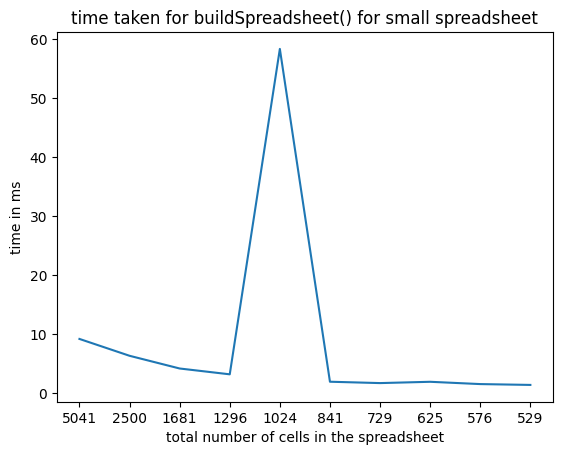

In [7]:
plt.xlabel("total number of cells in the spreadsheet")
plt.title("time taken for buildSpreadsheet() for small spreadsheet")
plt.ylabel("time in ms")
plt.plot( df_small.iloc[0])